In [1]:
# перечень используемых библиотек и модулей

import math
import numpy as np
import scipy.stats as st
import random as rnd

from matplotlib import pyplot as plt
from matplotlib import ticker as plt_ticker
from statsmodels.distributions.empirical_distribution import ECDF

# Описание задачи

<ol>
    <li>Выберите непрерывное распределение, не являющееся нормальным. </li>
    <p>
    <li>Сгенерировать из него выборку объёма 1 000, и построить гистограмму выборки. </li>
    <p>
    <li>Нарисовать поверх неё теоретическую плотность распределения случайной величины.</li>
    <p>
    <li>Оценить распределение выборочного среднего случайной величины при разных объёмах выборок k(например, 5, 10, 50).</li>
    <p>
    <li>Сгенерировать 1 000 выборок объёма k и постройте гистограммы распределений их выборочных средних. </li>
    <p>
    <li>Используя информацию о среднем и дисперсии исходного распределения, рассчитать значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. </li>
    <p>
    <li>Поверх каждой гистограммы нарисовать плотность соответствующего нормального распределения.</li>
    <p>
    <li>Описать разницу между полученными распределениями при различных значениях n. </li>
    <p>
    <li>Определить, как меняется точность аппроксимации распределения выборочных средних нормальным с ростом размера выборки k.</li>
</ol>

# Анализ и декомпозиция задачи

Целью данной работы было проведение анализа сходимости к нормальному (Гауссовому) виду распределения выборочных средних, полученных на основе синтетического случайной величины, не являющейся нормально-распределенной. 

Для целей настоящего экперимента предполагается использовать синтетическую случайную величину, которая будет представлять собой сумму двух независимых непрерывных случайных величин, имеющих различные виды распределения.

В рамках данной работы выполняются следующие под-задачи:
<ol>
<li>Задать исходные данные для расчетов</li>
<li>Определить пространство исходов совместного распределения случайных величин X и Y, построить его график, а также определить области непрерывности пространства исходов</li>
<li>Определение функции (CDF) и плотности (PDF)  синтетического распределения Z=X+Y, причем X~Triang(0,2) и Y~Exp(0.25).</li>
<li>Верификация целостности расчета функции распределения плотности вероятности синтетической случайной величины</li>    
<li>Расчет теоретических значений математического ожидания и дисперсии синтетической случайной величины</li>
<li>Построение графиков функции вероятности и функции плотности распределиния вероятности</li>
<li>Генерация выборки для данного синтетического распределения Z объемом 10 000 элементов</li>
<li>Построение распределения выборочных средних объема 5, 10 и 50 элементов</li>
<li>Расчет параметров нормального распределения, аппроксимирующего распределение выборочных средних при заданном размере выборки</li>
<li>Оценка скорости сходимости</li>
<li>Построение аналитических выводов</li>
</ol>

## 1. Задание исходных данных для расчетов

Введем определение исходных распределений:

${Z=X + Y}, \quad 
{X \thicksim Triang\left(0,2\right)\quad Y \thicksim Exp\left(\frac{1}{4}\right) }
$

Случайные величины X и Y являются статистически независимыми и имеют следующие функции распределения плотности вероятности:

${f_x =
  \begin{cases}
    0    & , x < 0\\
    x    & , 0\leq x \leq 1\\
    2-x  & , 1\leq x \leq2\\
    0    & , 0 < x\\
  \end{cases}
} \quad \quad \quad \quad
$
${f_y = \frac{1}{4}\mathrm{e}^{-\frac{y}{4}} ,\quad y \in \left(0, +\infty \right) }
$

Графики плотности (PDF) данных распределений изображены ниже:

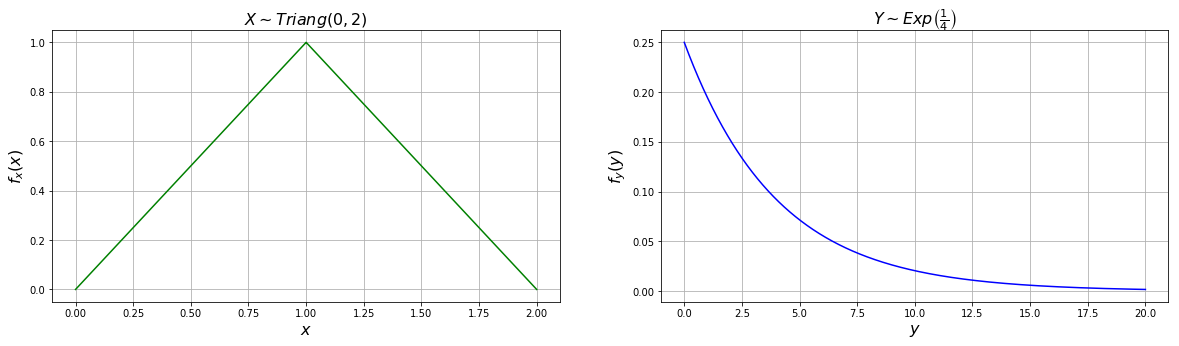

In [2]:
x_space= np.linspace(0,2,10000)
x_pdf = lambda x: 0 if x>2 else (x if 0<=x<=1 else 2-x)

fig, subplots = plt.subplots(1, 2)
fig.set_size_inches(20,5)
subplots[0].grid(which="both")
subplots[0].set_title(r"$X \sim Triang\left(0,2\right)$",fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].plot(x_space, map(x_pdf,x_space),"g-")
subplots[0].set_xlabel(r"$x$", fontdict= {"color":  "black","weight": "normal", "size": 16})
subplots[0].set_ylabel(r"$f_x\left( x \right)$", fontdict= {"color":  "black","weight": "normal", "size": 16})

y_space= np.linspace(0,20,10000)
y_pdf = lambda y: 0.25*math.exp(-1*y*0.25)
subplots[1].grid(which="both")
subplots[1].set_title(r"$Y \sim Exp\left(\frac {1}{4} \right)$",fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[1].plot(y_space, map(y_pdf,y_space),"b-")
subplots[1].set_xlabel(r"$y$", fontdict= {"color":  "black","weight": "normal", "size": 16})
subplots[1].set_ylabel(r"$f_y\left( y \right)$", fontdict= {"color":  "black","weight": "normal", "size": 16})

plt.show()

# 2. Определение пространства исходов ${\Omega}$ совместного распределения случайных величин X и Y

Теперь построим график совместного распределения данных случайных величин (обращаю внимание, что речь идет не о графике функции Z = X + Y, а о графике области совместного распределения X и Y):

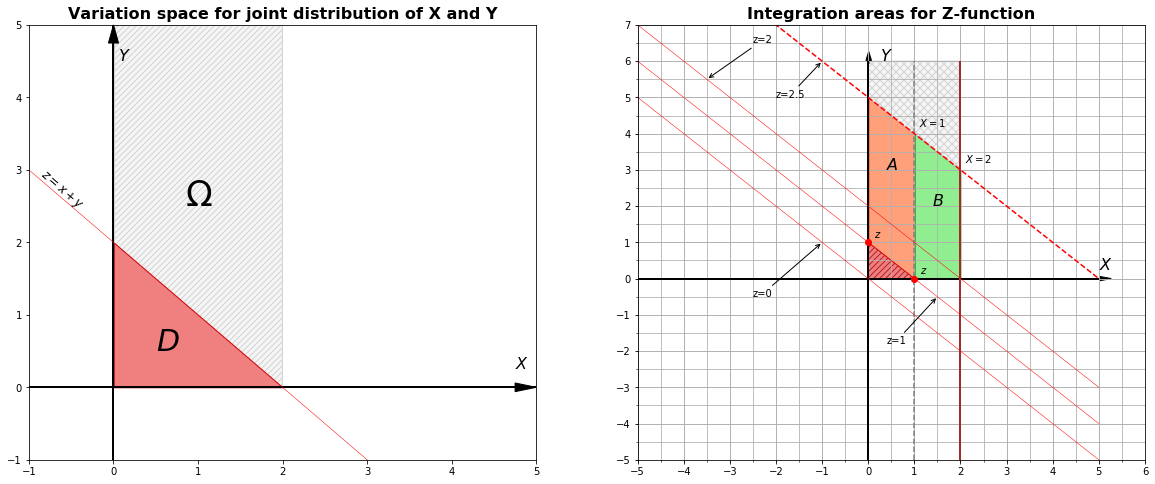

In [3]:
# Готовим набор данных для отображения на графиках
x_space = np.linspace(-5,5,1000)
z_func = lambda z, x: z - x
z0_line = map (lambda x: z_func(0,x), x_space)
z1_line = map (lambda x: z_func(1,x), x_space)
z2_line = map (lambda x: z_func(2,x), x_space)
z5_line = map (lambda x: z_func(5,x), x_space)

# Готовим объекты графического вывода
fig = plt.figure(figsize=(20,8))
subplots = fig.subplots(1,2)

#################################################################################
### Выводим пространство элементарных исходов совместного распределения X и Y ###
#################################################################################

subplots[0].set_title("Variation space for joint distribution of X and Y", 
                      fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].set_xlim(-1,5)
subplots[0].set_ylim(-1,5)
subplots[0].fill_between(x=x_space[500:700],
                         y1=np.full((1,200),5)[0],
                         y2=np.zeros(200),
                         facecolor="whitesmoke", 
                         edgecolor="lightgray", 
                         linewidth=1, 
                         hatch="////"
)

# Рисуем оси координат X и Y (со стрелками)
subplots[0].hlines(y=0, xmin=-1, xmax=5, linewidth = 2, color="k")
subplots[0].text(x=4.75, y=0.25, s="$X$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].vlines(x=0, ymin=-1, ymax=5, linewidth = 2, color="k")
subplots[0].text(x=0.05, y=4.5, s="$Y$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[0].arrow(x=4.7, y= 0, dx= 0.05, dy=0, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
subplots[0].arrow(x=0, y=4.65, dx=0, dy=0.1, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)

subplots[0].plot(x_space, z2_line, "r-", linewidth=0.5)

subplots[0].fill_between(x=x_space[500:700], 
                         y1=z2_line[500:700],
                         y2= np.zeros(200), 
                         facecolor="lightcoral", 
                         edgecolor="firebrick", 
                         linewidth=1)

subplots[0].text(x=-0.9, y=2.9, s="$z = x  + y$", 
                 rotation=-41,
                 fontdict= {"color":  "black", "size": 12})

subplots[0].text(x=0.85, y=2.5, s="$\Omega$", fontdict= {"color":  "black","weight": "bold", "size": 35})
subplots[0].text(x=0.5, y=0.5, s="$D$", fontdict= {"color":  "black","weight": "bold", "size": 30})

#############################################
### Выводим график области интегрирования ###
#############################################

# Готовим область рисования правого графика: выводим заголовок и координатную сетку в диапазоне (x=[-5,5]m y=[-5,7])
subplots[1].grid(which="both")
subplots[1].set_ylim(bottom=-5, top=7)
subplots[1].set_xlim(left=-5, right=6)

subplots[1].set_title("Integration areas for Z-function", fontdict= {"color":  "black","weight": "bold", "size": 16})

# Рисуем оси координат X и Y со стрелками
subplots[1].hlines(y=0, xmin=-5, xmax=5, linewidth = 2, color="k")
subplots[1].text(x=5, y=0.25, s="$X$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].vlines(x=0, ymin=-5, ymax=6, linewidth = 2, color="k")
subplots[1].text(x=0.25, y=6, s="$Y$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].arrow(x=4.92, y= 0, dx= 0.1, dy=0, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
subplots[1].arrow(x=0.01, y=5.92, dx=0, dy=0.1, width=0.002, color="k", clip_on=False, head_width=0.12, head_length=0.25)
    
# Выводим штрихи для обозначения главных (width=1) и вспомогательных (width=0.5) делений координатной сетки
major_ticks = plt_ticker.MultipleLocator(base=1.0)
minor_ticks = plt_ticker.MultipleLocator(base=0.5)
subplots[1].xaxis.set_minor_locator(minor_ticks)
subplots[1].xaxis.set_major_locator(major_ticks)
subplots[1].yaxis.set_minor_locator(minor_ticks)
subplots[1].yaxis.set_major_locator(major_ticks)

# Отрисовываем заливку областей интегрирования
subplots[1].fill_between(x=x_space[500:600], 
                         y1=z5_line[500:600],
                         y2= np.zeros(100), 
                         facecolor="lightsalmon", 
                         edgecolor="orangered", 
                         linewidth=1)
subplots[1].text(x=0.375, y=3.0, s="$A$",fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].fill_between(x=x_space[600:700], 
                         y1=z5_line[600:700],
                         y2= np.zeros(100), 
                         facecolor="lightgreen", 
                         edgecolor="forestgreen", 
                         linewidth=1)
subplots[1].text(x=1.375, y=2.0, s="$B$",fontdict= {"color":  "black","weight": "bold", "size": 16})

# Отрисовываем пределы интегрирования функции плотности распределения Z
subplots[1].plot(x_space, z0_line, "r-", linewidth=0.5)
subplots[1].annotate('z=0', xy=(-1, 1), xytext=(-2.5, -0.5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z1_line, "r-", linewidth=0.5)
subplots[1].annotate('z=1', xy=(1.5, -0.5), xytext=(0.4, -1.8), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z2_line, "r-", linewidth=0.5)
subplots[1].annotate('z=2', xy=(-3.5, 5.5), xytext=(-2.5, 6.5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

subplots[1].plot(x_space, z5_line, "r--", linewidth=1.5)
subplots[1].annotate('z=2.5', xy=(-1, 6), xytext=(-2, 5), arrowprops=dict(facecolor="red", arrowstyle="->"), )

# Отрисовываем пределы области интегрирования по оси X
subplots[1].vlines(x=2, ymin=-5, ymax=6,  linewidth = 2, color="brown")
subplots[1].text(x=2.1, y=3.2, s="$X=2$")

subplots[1].vlines(x=1, ymin=-5, ymax=6,  linewidth = 1.5, color="gray", linestyles="dashed")
subplots[1].text(x=1.1, y=4.2, s="$X=1$")

# Отрисовываем область интегрирования
subplots[1].fill_between(x=x_space[500:600], 
                         y1=z1_line[500:600],
                         y2= np.zeros(100), 
                         facecolor="lightcoral", 
                         edgecolor="firebrick", 
                         linewidth=1, hatch="////")

# Отрисовываем полную область совместного распределения
subplots[1].fill_between(x=x_space[500:700], 
                 y1=z5_line[500:700],
                 y2= np.full((1,200),6)[0], 
                 facecolor="whitesmoke", 
                 edgecolor="lightgray", 
                 linewidth=1, 
                 hatch="xxx")


# Отображаем точками примеры значения переменной z для иллюстрации переменного характера пределов области интегрирования
z_plots = ([0, 1], [1, 0])
subplots[1].plot(z_plots[0], z_plots[1], "ro")
subplots[1].text(x=0.125, y=1.125, s="$z$")
subplots[1].text(x=1.125, y=0.125, s="$z$")

# Финализируем подготовку области вывода и отображаем графики
plt.show()

<h3>3. Определение CDF и PDF синтетиского распределения</h3>

На первом шаге необходимо дать определение функции распределения новой случайной величины Z.

Как видно из определения, область определения функции вероятнос
ти $F_z(z)$ представляет собой пересейчение двух множеств: $\Omega$ и $\left\{x,y:x+y<z\right\}$ при некотором заданном z.
<p>Таким образом, функция вероятности суммы двух <u><i>независимых случайных величин</i></u> может быть выражена следующей формулой, где D - область определения функциии $F_z$

$F_{z} \left( z\right)=P\left(Z<z\right)=P\left(X+Y<z \space | \space X=x, Y=y\right)=\iint_D{f_{xy}(x,y)} dD, 
\quad f_{xy}\left(x, y\right) = f_{x}\left(x\right)f_{y}\left(y\right)
$

Заметим, что функция распределения случайной величины Y непрпрерывна на всем интервале $\left(0, +\infty \right)$, в то время, как функция плотности распределения случайной величины X имеет два интервала непрерывности (помимо интервалов, на которых она тождественно равна нулю), а именно: $\left(0 \leq x \leq 1 \right) , \space \left(1 \leq x \leq 2 \right)$. 

<p>Исходя из этого, выделим следующие области интегрирования, на которых функции плотности распределения обеих случайных величин обладают свойством непрерывности:  $ D = A \space \left\{x,y: x \in (0,1), y \in (0,+\infty)\right\} \bigcup B \space \left\{x,y: x \in (1,2), y \in (0,+\infty)\right\} $ (см. рис. выше). 

С учетом этого, функция плотности совместного распределения X и Y имеет следующее определение:

$
f_{xy} (X=x, Y=y) = \begin{cases}
\frac{x}{4}\mathrm{e}^{-\frac{y}{4}}, D\left\{x,y: x \in (0,1), y \in (0,+\infty)\right\}\\
\frac{2-x}{4}\mathrm{e}^{-\frac{y}{4}}, D\left\{x,y: x \in (1,2), y \in (0,+\infty)\right\}\\
0, D\left\{x,y: x \notin (1,2), y < 0)\right\}\\
\end{cases}
$

Вычислим значение функции вероятности синтетитческого распределения Z, поспользовавшись интегрированием функции плотности совместного распределения по области D:

$
F_{z} = \begin{cases}
\int_0^z\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y,       & 0 \leq z \leq 1\\
{\int_0^1\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right)\mathrm{d}y} 
+ {\int_1^z\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{2-z}{4}x\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y}, & 1 \leq z \leq 2 \\
{\int_0^1\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{x}{4}\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y} + 
{\int_1^2\mathrm{d}x \int_0^{\left( z-x \right)} \left( \frac{2-z}{4}x\mathrm{e}^{-\frac{y}{4}} \right) \mathrm{d}y},  & z > 2 
\\ 
\end{cases}
\quad = \\ \quad = 
\begin{cases}
{\frac{z^2}{2}-4\left(z+4\mathrm{e}^{-\frac{z}{4}} - 4\right)},                             & 0 \leq z \leq 1\\
{6z - \frac{z^2}{2}+32\mathrm{e}^{\frac {1-z}{4}}-16\mathrm{e}^{\frac{-z}{4}}-25},          & 1 \leq z \leq 2 \\
{32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{2-z}{4}}-16\mathrm{e}^{-\frac{z}{4}}+1},  & z > 2 \\
\end{cases}
$

Для вычисления функции плотности распреления вероятности синтетической случайной величины Z, проведем дифференцирование полученной функции вероятности по переменной z следующим образом:

$
{f_x =
  \begin{cases}
	\frac{\mathrm{d}}{\mathrm{d}z} \left(\frac{z^2}{2}-4\left(z+4\mathrm{e}^{-\frac{z}{4}} - 4\right) \right), & 0 \leq z \leq 1 \\
	\frac{\mathrm{d}}{\mathrm{d}z} \left( {6z - \frac{z^2}{2}+32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{-z}{4}}-25 }\right), & 1 \leq z \leq 2 \\
	\frac{\mathrm{d}}{\mathrm{d}z} \left({32\mathrm{e}^{\frac{1-z}{4}}-16\mathrm{e}^{\frac{2-z}{4}}-16\mathrm{e}^{-\frac{z}{4}}+1} \right), & z > 2 \\
  \end{cases}
} \quad = \quad 
\begin{cases}
	{z + 4 \mathrm{e}^{-\frac{z}{4}} - 4},  & 0 \leq z \leq 1 \\
	{6-z + 4\mathrm{e}^{-\frac{z}{4}} - 8\mathrm{e}^{\frac{1-z}{4}}}, & 1 \leq z \leq 2 \\
	{4 \left(  \mathrm{e}^{\frac{1}{4}} - 1 \right )^2 \mathrm{e}^{-\frac{z}{4}}}, & z > 2 \\
\end{cases}
$

<b>ВАЖНО!</b> Подробности проведенных вычислений приведены в следующих ссылках:

$0 \leq z \leq 1: F_{z} = $ https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%22z%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

График функции на участке - https://www.wolframalpha.com/input/?i=plot+z%5E2%2F2+-+4z-16*exp%28-z%2F4%29%2B16%2C+0%3Cz%3C1

$1 \leq z \leq 2: F_{z} = $ 

а) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%221%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

б)  https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%22z%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28%282-x%29%2F4%29*exp%28-y%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%221%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22  

График функции вероятности на участке - <a href = "https://www.wolframalpha.com/input/?i=plot+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25%2C+1<z<2"> https://www.wolframalpha.com/input/?i=plot+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25%2C+1<z<2 </a>

Расчет плотности -  https://www.wolframalpha.com/input/?i=differentiate+6z+-+z%5E2%2F2%2B32exp%28%281-z%29%2F4%29-16*exp%28-z%2F4%29-25

График плотности - https://www.wolframalpha.com/input/?i=plot+-z+%2B+4+e%5E%28-z%2F4%29+-+8+e%5E%28%281+-+z%29%2F4%29+%2B+6%2C+1%3Cz%3C2


$z > 2: F_{z} = $ 

a) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%221%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28x%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

б) https://www.wolframalpha.com/input/?i=double+integral&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%22z-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%222%22&assumption=%7B%22C%22%2C+%22double+integral%22%7D+-%3E+%7B%22Calculator%22%7D&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22%28%282-x%29%2F4%29*exp%28%28-y%29%2F4%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%221%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22

График функции на участке - https://www.wolframalpha.com/input/?i=plot+%284*%283*exp%281%2F4%29-4%29*exp%28-z%2F4%29%2B1%2F2%29%2B%2820*exp%28%281-z%29%2F4%29-16*exp%28%282-z%29%2F4%29%2B1%2F2%29%2C+2%3Cz%3C10

Расчет плотности - https://www.wolframalpha.com/input/?i=differentiate+32*exp%28%281-z%29%2F4%29-16*exp%28%282-z%29%2F4%29-16*exp%28-z%2F4%29%2B1

График плотности - https://www.wolframalpha.com/input/?i=plot+4*%28-1+%2B+e%5E%281%2F4%29%29%5E2+e%5E%28-z%2F4%29%2C+2%3Cz%3C10

<h3>4.Верификация целостности расчета функции распределения плотности вероятности синтетической случайной величины</h3>

Перед тем, как продолжить работу, необходимо убедиться, что функция плотности вероятности корректно определена на всей числовой приямой: $ \int_{-\infty}^{+\infty}{f_{z}\left(z\right)} \space \mathrm{d}z \equiv 1 $

Поскольку функция плотности $f_{z}\left(z\right)$ определена на 3-х интервалах (на остальной части числовой прямой функция тождественно равна нулю), нам для проверки необходимо проинтегрировать ее на каждом из интервалов и сложить полученные результаты:

$
\int_{0}^{1} {\left( z + 4 \mathrm{e}^\frac{-z}{4} - 4 \right)}  \space \mathrm{d}z \space +
\int_{1}^{2} {\left(6 - z + 4 \mathrm{e}^\frac{-z}{4} - 8 \mathrm{e}^\frac{1-z}{4} \right) }  \space \mathrm{d}z \space +
\int_{2}^{+\infty} {\left( 4 \left(\mathrm{e}^\frac{1}{4}-1\right)^2 \mathrm{e}^\frac{-z}{4} \right)} \space \mathrm{d}z \space 
= \\
=\dfrac{25}{2} - \dfrac{16}{\mathrm{e}^{\frac{1}{4}}} - \dfrac{55}{2} - \dfrac{16}{\mathrm{e}^{\frac{1}{2}}} + \dfrac{48}{\mathrm{e}^{\frac{1}{4}}} + 16 \dfrac{(\mathrm{e}^{\frac{1}{4}}-1)^2}{\mathrm{e}^{\frac{1}{2}}} \equiv 1
$

<b>ВАЖНО!</b> Подробности проведенных вычислений приведены в следующих ссылках:

a) $0 \leq z \leq 1: $ https://www.wolframalpha.com/input/?i=integral+z%2B4*exp%28-z%2F4%29-4+from+0+to+1

б) $1 \leq z \leq 2: $ https://www.wolframalpha.com/input/?i=integral+6+-z+%2B+4+e%5E%28-z%2F4%29+-+8+e%5E%28%281+-+z%29%2F4%29+from+1+to+2

в) $ z > 2: $ https://www.wolframalpha.com/input/?i=integral+4*%28-1+%2B+e%5E%281%2F4%29%29%5E2+e%5E%28-z%2F4%29+from+2+to+infinity

Суммирование по интервалам - https://www.wolframalpha.com/input/?i=25%2F2+-+16%2Fe%5E%281%2F4%29+%2B+-55%2F2+-+16%2Fsqrt%28e%29+%2B+48%2Fe%5E%281%2F4%29+%2B+%2816+%28e%5E%281%2F4%29+-+1%29%5E2%29%2Fsqrt%28e%29

<h3>5. Расчет теоретических значений математического ожидания и дисперсии синтетической случайной величины</h3>

Так как нам известна функция плотности вероятности синтетической случайной величины, для начала вычислим ее первый и второй моменты:

$E\left(Z\right)=
\int_{-\infty}^{+\infty}{ zf_z\left(z\right)\mathrm{d}z}  = \\
\int_{0}^{1} {\left( z^2 + 4z \mathrm{e}^{-\frac{z}{4}} - 4z \right) \mathrm{d}z} + {\int_{1}^{2} {\left( 6z - z^2 + 4z\mathrm{e}^{-\frac{z}{4}} - 8z\mathrm{e}^{\frac{1-z}{4}} \right) \mathrm{d}z}} + \int_{2}^{+\infty}{4z \left( \mathrm{e}^{\frac{1}{4}} - 1 \right )^2 \mathrm{e}^{-\frac{z}{4}} \mathrm{d}z}
=\\
=\dfrac{192}{\sqrt[4]{\mathrm{e}}} + \dfrac{96\left( \sqrt[4]{\mathrm{e}} -1 \right)^2}{\sqrt{\mathrm{e}}}-\dfrac{96}{\sqrt{\mathrm{e}}}-96 \approx 4.9999...(999)
$

<b>ВАЖНО!</b> Подробности расчета приведены по ссылке:
https://www.wolframalpha.com/input/?i=%28integrate+z%5E2%2B4z*exp%28-z%2F4%29-4*z+dz%2C+z%3D0..1%29%2B%28integrate+6z-z%5E2%2B4z*exp%28-z%2F4%29-8*z*exp%28%281-z%29%2F4%29+dz%2C+z%3D1..2%29+%2B+%28integrate+4z*exp%28-z%2F4%29*%28exp%281%2F4%29-1%29%5E2+dz%2C+z%3D2..infinity%29+

$E\left(Z^2\right)=
\int_{-\infty}^{+\infty}{ z^2 f_z\left(z\right)\mathrm{d}z}  = \\
 \int_{0}^{1} {\left( z^3 + 4z^2 \mathrm{e}^{-\frac{z}{4}} - 4z^2 \right) \mathrm{d}z} + {\int_{1}^{2} {\left( 6z^2 - z^3 + 4z^2\mathrm{e}^{-\frac{z}{4}} - 8z^2\mathrm{e}^{\frac{1-z}{4}} \right) \mathrm{d}z}} + \int_{2}^{+\infty}{4z^2 \left( \mathrm{e}^{\frac{1}{4}} - 1 \right )^2 \mathrm{e}^{-\frac{z}{4}} \mathrm{d}z}
=\\ 
\dfrac{1664}{\sqrt[4]{\mathrm{e}}} + \dfrac{832\left( \sqrt[4]{\mathrm{e}} -1 \right)^2}{\sqrt{\mathrm{e}}}-\dfrac{832}{\sqrt{\mathrm{e}}}- \dfrac{4745}{6} \approx 41.1666...(666)
$

<b>ВАЖНО!</b> Подробности расчета приведены по ссылке: https://www.wolframalpha.com/input/?i=%28integrate+z%5E3%2B4*%28z%5E2%29*exp%28-z%2F4%29-4*z%5E2+dz%2C+z%3D0..1%29%2B%28integrate+6z%5E2-z%5E3%2B4*%28z%5E2%29*exp%28-z%2F4%29-8*%28z%5E2%29*exp%28%281-z%29%2F4%29+dz%2C+z%3D1..2%29+%2B+%28integrate+4*%28z%5E2%29*exp%28-z%2F4%29*%28exp%281%2F4%29-1%29%5E2+dz%2C+z%3D2..infinity%29+

Используя вычисленные значения первого и второго моментов синтетического распределения, вычислим теоретические значения дисперсии и среденеквадратичного отклонения:

$
 Var(Z) = E\left(Z^2\right) - E^2\left(Z\right)=
 \dfrac{1664}{\sqrt[4]{\mathrm{e}}} + \dfrac{832\left( \sqrt[4]{\mathrm{e}} -1 \right)^2}{\sqrt{\mathrm{e}}}-\dfrac{832}  {\sqrt{\mathrm{e}}}- \dfrac{4745}{6} - \left( 
 \dfrac{192}{\sqrt[4]{\mathrm{e}}} + \dfrac{96\left( \sqrt[4]{\mathrm{e}} -1 \right)^2}{\sqrt{\mathrm{e}}}-\dfrac{96}{\sqrt{\mathrm{e}}}-96
 \right)^{2} = 
 \\
 \quad \quad \quad =\dfrac{97}{6} \approx 16.1666...(666)
$


$\sigma_z = \sqrt{Var\left(Z\right)} = \sqrt{\dfrac{97}{6}} = 4.02078$

<b>ВАЖНО!</b> Подробности расчета приведены по ссылкам:

а) Расчет дисперсии -  https://www.wolframalpha.com/input/?i=%28-4745%2F6+-+832%2Fsqrt%28e%29+%2B+%28832+%28e%5E%281%2F4%29+-+1%29%5E2%29%2Fsqrt%28e%29+%2B+1664%2Fe%5E%281%2F4%29%29+-+%28-91+-+96%2Fsqrt%28e%29+%2B+%2896+%28e%5E%281%2F4%29+-+1%29%5E2%29%2Fsqrt%28e%29+%2B+192%2Fe%5E%281%2F4%29%29%5E2

б) Расчет среднеквадратического отклонения - https://www.wolframalpha.com/input/?i=sqrt%2897%2F6%29

<h3>6.Построение графиков функции вероятности и функции плотности вероятности</h3>

Построим график основных показателей синтетической случайной величины Z: функции вероятности (CDF - cumulative density function) и функции плотности вероятности (PDF - probability density function).

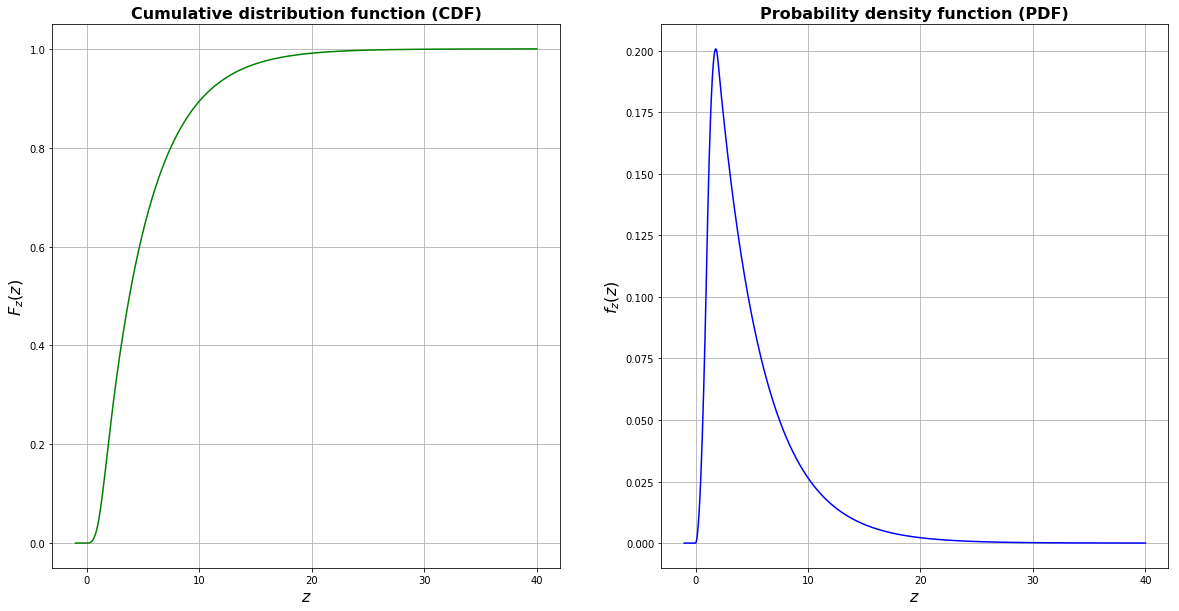

In [4]:
# Задаем функцию вероятности случайной величины Z для каждого из интервалов области определения
def z_CDF(z):
    if z<0:
        return 0
    if 0<=z<=1:
        return 0.5*z**2 - 4*z-16.*math.exp(-0.25*z)+16.
    if 1<=z<=2:
        return 6.*z - 0.5*z**2.+32.*math.exp(0.25*(1.-z))-16*math.exp(-0.25*z)-25.
    if z>2:
        return 32.*math.exp(0.25*(1.-z))-16.*math.exp(0.25*(2.-z))-16.*math.exp(-0.25*z)+1.

# Задаем функцию плотности вероятности случайной величины Z для каждого из интервалов области определения    
def z_PDF(z):
    if z<0:
        return 0
    if 0<=z<=1:
        return z+4.*math.exp(-0.25*z)-4.
    if 1<=z<=2:
        return -z + 4*math.exp(-0.25*z) - 8*math.exp(0.25*(1 - z)) + 6.
    if z>2:
        return 4*(-1 + math.exp(0.25))**2*math.exp(-0.25*z)

# Задаем область определения случайной величины Z
x_space = np.linspace(-1,40,1000)

# Готовим область графического вывода с двумя под-графиками
fig, subplots = plt.subplots(1,2)
fig.set_size_inches(20,10)

# Задаем название и параметры координатной сетки для каждого из под-графиков
subplots[0].grid(which="both")
subplots[0].set_title("Cumulative distribution function (CDF)",
                     fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].grid(which="both")
subplots[1].set_title("Probability density function (PDF)",
                     fontdict= {"color":  "black","weight": "bold", "size": 16})

# Задаем название осей координат для каждого из под-графиков
subplots[0].set_xlabel("${z}$", fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[0].set_ylabel("$F_{z}(z)$", fontdict= {"color":  "black","weight": "bold", "size": 16})

subplots[1].set_xlabel("${z}$", fontdict= {"color":  "black","weight": "bold", "size": 16})
subplots[1].set_ylabel("$f_{z}(z)$", fontdict= {"color":  "black","weight": "bold", "size": 16})

# Выводим графики функций
subplots[0].plot(x_space, map(z_CDF, x_space), "g-")
subplots[1].plot(x_space, map(z_PDF, x_space), "b-")

plt.show()

<h3>7.Генерация выборки для данного синтетического распределения Z объемом 10 000 элементов</h3>

Создадим класс для работы с полученным синтетическим распределением, а также определим выборочное среднее и выборочное среднеквадратическое отклонение данного распределения:

In [5]:
# Определяем нашу синтетическую СВ как класс-наследник от базовой непрерывной СВ (st.rv_continuous)
class Z_SyntheticDistribution(st.rv_continuous):
    def _pdf(self,x):
        return z_PDF(x)
    def _cdf(self,x):
        return z_CDF(x)

# Задаем пределы области определения случайной величины Z
z_domain_min = 0.
z_domain_max = 40.

# Создаем экземплят случайной величины Z
z_rv = Z_SyntheticDistribution(a=z_domain_min, b=z_domain_max, name='Z_SyntheticRV')

# Получаем основные характеристики распределения случайной величины Z, 
# расчитанные с использованием функционала базового класса (st.rv_continuous)
z_mean = z_rv.mean()
z_var = z_rv.var()
z_sigma = math.sqrt(z_var)

z_distribution_sample = z_rv.rvs(size=10000)

# Выводим полученные значения характеристик распределения на экран
print("Характеристики распределения Z, расчитанные библиотекой scipy.stats.rv_continuous:\n")
print("\tМатематическое ожидание         :\t{0}".format(z_mean))
print("\tДисперсия                       :\t{0}".format(z_var))
print("\tСреднеквадратическое отклонение :\t{0}".format(z_sigma))

Характеристики распределения Z, расчитанные библиотекой scipy.stats.rv_continuous:

	Математическое ожидание         :	4.99976560567
	Дисперсия                       :	16.1483837765
	Среднеквадратическое отклонение :	4.01850516691


Как мы видим, результаты расчета данных показателей библиотекой SciPy по заданному определению PDF и CDF отличаются от эталонных показателей, расчитанных математически на величину: $\Delta \mu_z \leq 2 \times 10^{-4},\quad \Delta \sigma_z \leq 2 \times 10^{-3}$. Как мы видим отклонения от эталонных значений, расчитанных математически, являются несушественными для расчета. Поэтому далее мы будем брасть за эталонные значения математического ожидания, дисперсии и среднеквадратического отклонения, полученные из библитеки SciPy.

Сгенерируем выборку величины 10 000 элементов на основании полученной функции плотности вероятности синтетической случайной величины Z и построим диаграмму полученных данных:

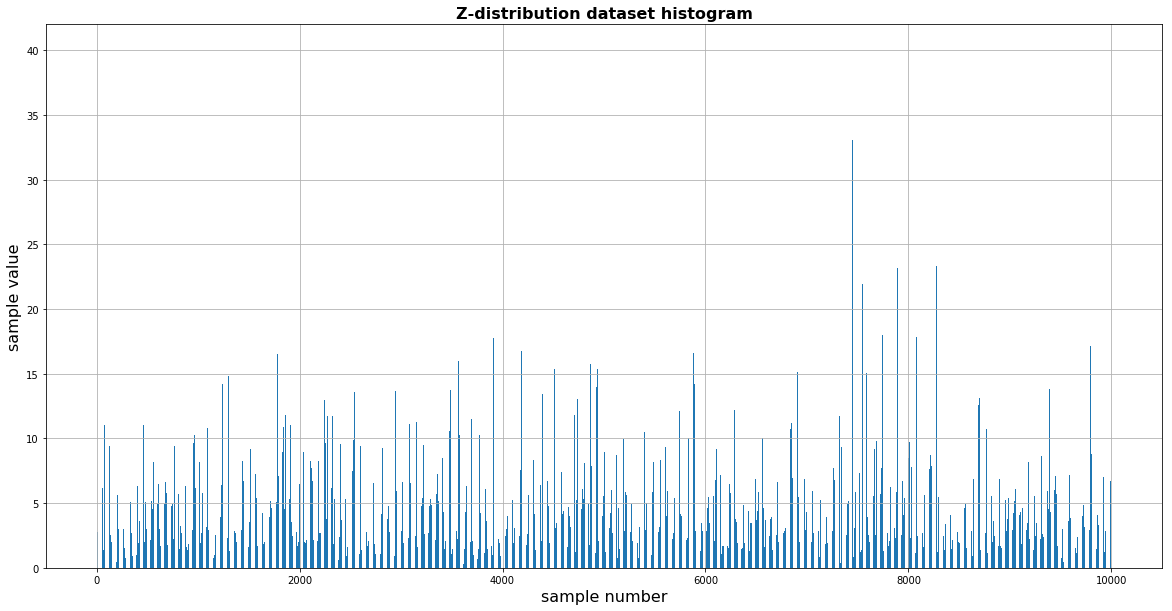

In [6]:
# Рисуем гистограмму полученной выборки из синтетического распределения.
plt.figure(figsize=(20,10))
plt.grid(which="both")
plt.xlabel("sample number", fontdict= {"color":  "black","weight": "normal", "size": 16})
plt.ylabel("sample value", fontdict= {"color":  "black","weight": "normal", "size": 16})

plt.title("Z-distribution dataset histogram", fontdict= {"color":  "black","weight": "bold", "size": 16})
plt.bar(range(len(z_distribution_sample)), z_distribution_sample, 0.5)

plt.show()

На основании созданной выборки из синтетического распределения Z, построим график функции плотности вероятности, а также отобразим на нем основные характеристики данного распределения: математическое ожидание и среднеквадратическое отклонение.

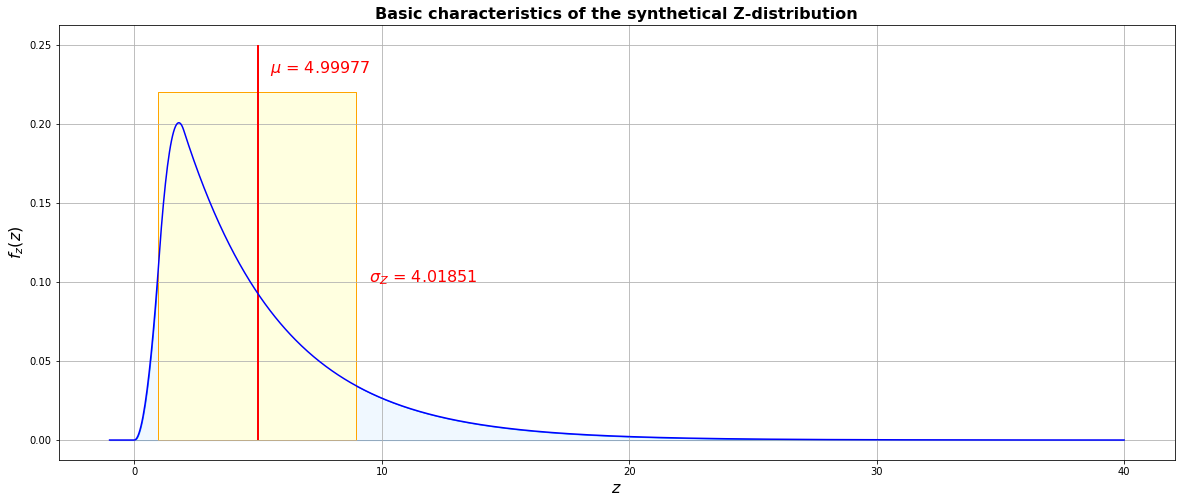

In [7]:
# Готовим область для вывода графики
plt.figure(figsize=(20,8))

# Задаем название осей координат
plt.xlabel("$z$", fontdict= {"color":  "black","weight": "normal", "size": 16})
plt.ylabel(r"$f_z\left( z \right)$", fontdict= {"color":  "black","weight": "normal", "size": 16})

# Задаем название графика
plt.title("Basic characteristics of the synthetical Z-distribution",
          fontdict= {"color":  "black","weight": "bold", "size": 16})

# Рисуем область под графиком функции плотности распределения Z
plt.fill_between(x=x_space,
                 y1=map(z_PDF, x_space),
                 y2=np.zeros(len(x_space)),
                 facecolor="aliceblue", 
                 edgecolor="dodgerblue", 
                 linewidth=1)

# Отображаем координатную сетку
plt.grid(which="both")

# Выводим график плотности расрпеделения случайной величины Z
plt.plot(x_space, map(z_PDF, x_space), "b-")

# Находим индексы элементов выборки, которые наиболее близко соответствуют пределам области стандартного отклонения
z_sigma_x_min = np.argmin(np.abs(x_space - (z_mean - z_sigma)))
z_sigma_x_max = np.argmin(np.abs(x_space - (z_mean + z_sigma)))
z_sigma_space = x_space[z_sigma_x_min:z_sigma_x_max]

# Обозначаем значение математического ожидания вертикальной линией красного цвета
plt.vlines(x=z_mean,ymin=0,ymax=0.25,label="mean",linewidth = 2, color="r")

# Выводим область стандартного отклонения случайной величины Z
plt.fill_between(x  = z_sigma_space,
                 y1 = np.zeros(len(x_space[z_sigma_x_min:z_sigma_x_max])),
                 y2 = np.full(len(x_space[z_sigma_x_min:z_sigma_x_max]),0.22)[0],
                 facecolor="lightyellow", 
                 edgecolor="orange", 
                 linewidth=1)

# Выводим текст со значением математического ожидания
plt.text(x=z_mean+0.5, 
         y = 0.232, 
         s=r"$ \mu $ = {0:5.5f}".format(z_mean), 
         fontdict= {"color":  "red","weight": "normal", "size": 16})

# Выводим текст со значением стандартного отклонения
plt.text(x=z_sigma_space[-1] +0.5, 
         y = 0.1, 
         s=r"$ \sigma_Z$ = {0:5.5f}".format(z_sigma), 
         fontdict= {"color":  "red","weight": "normal", "size": 16})

plt.show()

Для анализа свойст полученных данных распределения Z, построим ряд гистограмм, иллюстрирующих данные выборки с разной плотностью их группироваки:

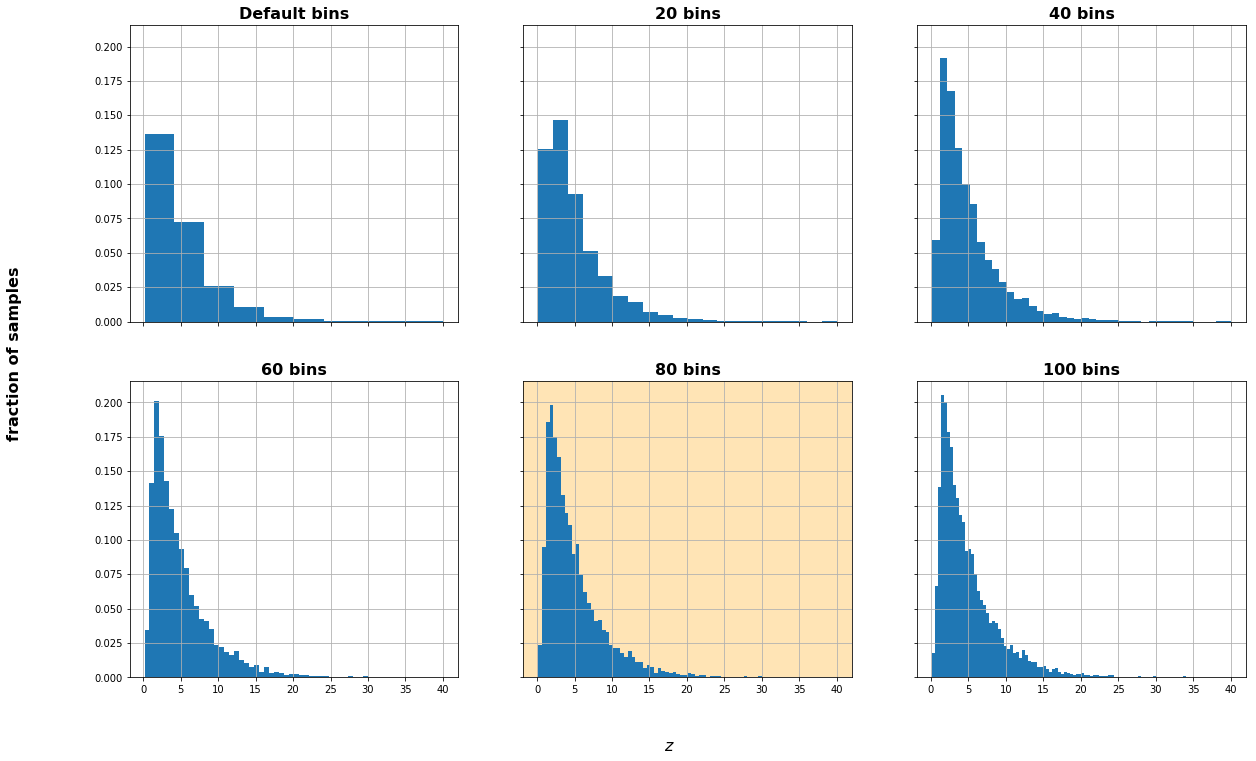

In [8]:
# Готовим область для вывода графиков (2 х 3)
fig, axes = plt.subplots(2,3,sharex='all', sharey='all')
fig.set_size_inches(20,12)

# Выводи общее наименование осей координат для всех под-графиков
fig.text(0.5, 0.04, "$z$", ha="center", 
         fontdict= {"color":  "black","weight": "bold", "size": 16})
fig.text(0.04, 0.5, "fraction of samples", 
         va='center', rotation='vertical',
         fontdict= {"color":  "black","weight": "bold", "size": 16})

# Определяем количество групп для гистограмм
number_of_bins = [None, 20, 40, 60,80, 100]

# Итерируем под-графики и в каждом из них выводим гистограмму с соответствующим количеством групп
for i, hist_graph in enumerate(axes.ravel()):
    
    # Выводим заголовок и координатую сетку
    hist_graph.grid(which="both")
    hist_graph.set_title("Default bins" if i == 0 else "{0} bins".format(number_of_bins[i]),
                      fontdict= {"color":  "black","weight": "bold", "size": 16})
    
    # Выводим гистрограмму
    hist_graph.hist(z_distribution_sample, density=True, bins=number_of_bins[i])
    
    # Отмечаем гистограмму №5 цветом фона, так как она наиболее точно передает характер распределения СВ
    if i==4:
        hist_graph.set_facecolor("moccasin")

plt.show()

Как видно наиболее корректное отображение выборке гистограммой получается при количестве групп, равном 80. 
Построим графики для иллюстрации сходимости выборочного распределения к теретической модели, описанной формулами в гл.3:

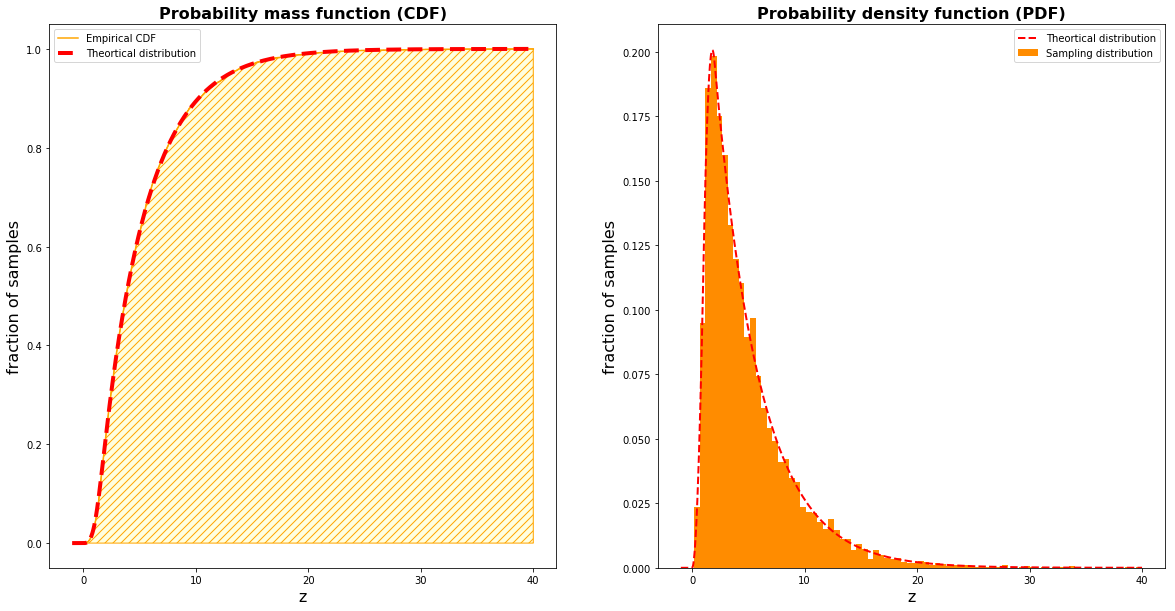

In [9]:
# Создаем экземпляр объекта ECDF (Empirical cumulative density dunction) 
# Он нужен для построения функции распределения по имеющейся выборке
z_empirical_cdf = ECDF(z_distribution_sample)

# Подготовка графики
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,10)

# Вывод заголовка
axes[0].set_title("Probability mass function (CDF)", fontdict= {"color":  "black","weight": "bold", "size": 16})

# Вывод графика эмпирической плотности распределения
axes[0].step(z_empirical_cdf.x, z_empirical_cdf.y, label='Empirical CDF', color="orange")

# Вывод графика теоретической (описанной математически в гл. 3) плотности распределения
axes[0].plot(x_space, map(z_rv.cdf, x_space), "r--", label="Theortical distribution", linewidth=4)

# Отрисовка области под графиком эмпирического распределения
axes[0].fill_between(x=z_empirical_cdf.x,
                     y1 = z_empirical_cdf.y,
                     y2 = np.zeros(len(z_empirical_cdf.y)),
                     facecolor="lightyellow", 
                     edgecolor="orange", 
                     linewidth=1,
                     hatch="///"
                    )


# Вывод названия осей координат и легенды левого под-графика
axes[0].set_xlabel(xlabel="z",fontdict= {"color":  "black","weight": "normal", "size": 16})
axes[0].set_ylabel(ylabel="fraction of samples", fontdict= {"color":  "black","weight": "normal", "size": 16})
axes[0].legend()

# Вывод названия левого под-графика
axes[1].set_title("Probability density function (PDF)", fontdict= {"color":  "black","weight": "bold", "size": 16})

# Отрисовка гистограммы распределения СВ Z и графика теоретической плотности вероятности поверх нее.
axes[1].hist(z_distribution_sample, density=True, bins=80, label="Sampling distribution", color="darkorange")
axes[1].plot(x_space, map(z_rv.pdf, x_space), "r--", label="Theortical distribution", linewidth=2)

# Вывод названия осей координат и легенды правого под-графика
axes[1].set_xlabel(xlabel="z",fontdict= {"color":  "black","weight": "normal", "size": 16})
axes[1].set_ylabel(ylabel="fraction of samples", fontdict= {"color":  "black","weight": "normal", "size": 16})
axes[1].legend()

plt.show()

<h3>8.Построение распределения выборочных средних для данного синтетического распределения Z</h3>

Для доказательства сходимости распределения выборочных средних, взятых из данных исходной выборки синтетического распределения Z=X+Y, проведем ряд вспомогательных шагов:
<p>
<li>построим массив выборок из распределения Z с различными значениями величины выборки $k = \left\{5, 10, 50\right\}$. Размер массива для каждой величины выборки будет равен 1000.</li>
<li>расчитаем значение математического ожидания (выборочного среднего) для каждой выборки. Таким образом для каждого значения $k$ мы получим массив из 1000 значений расчитанного выборочного среднего.</li>
<li>построим гистограмму распределения выборочного среднего для каждого значения $k$</li>
</p>

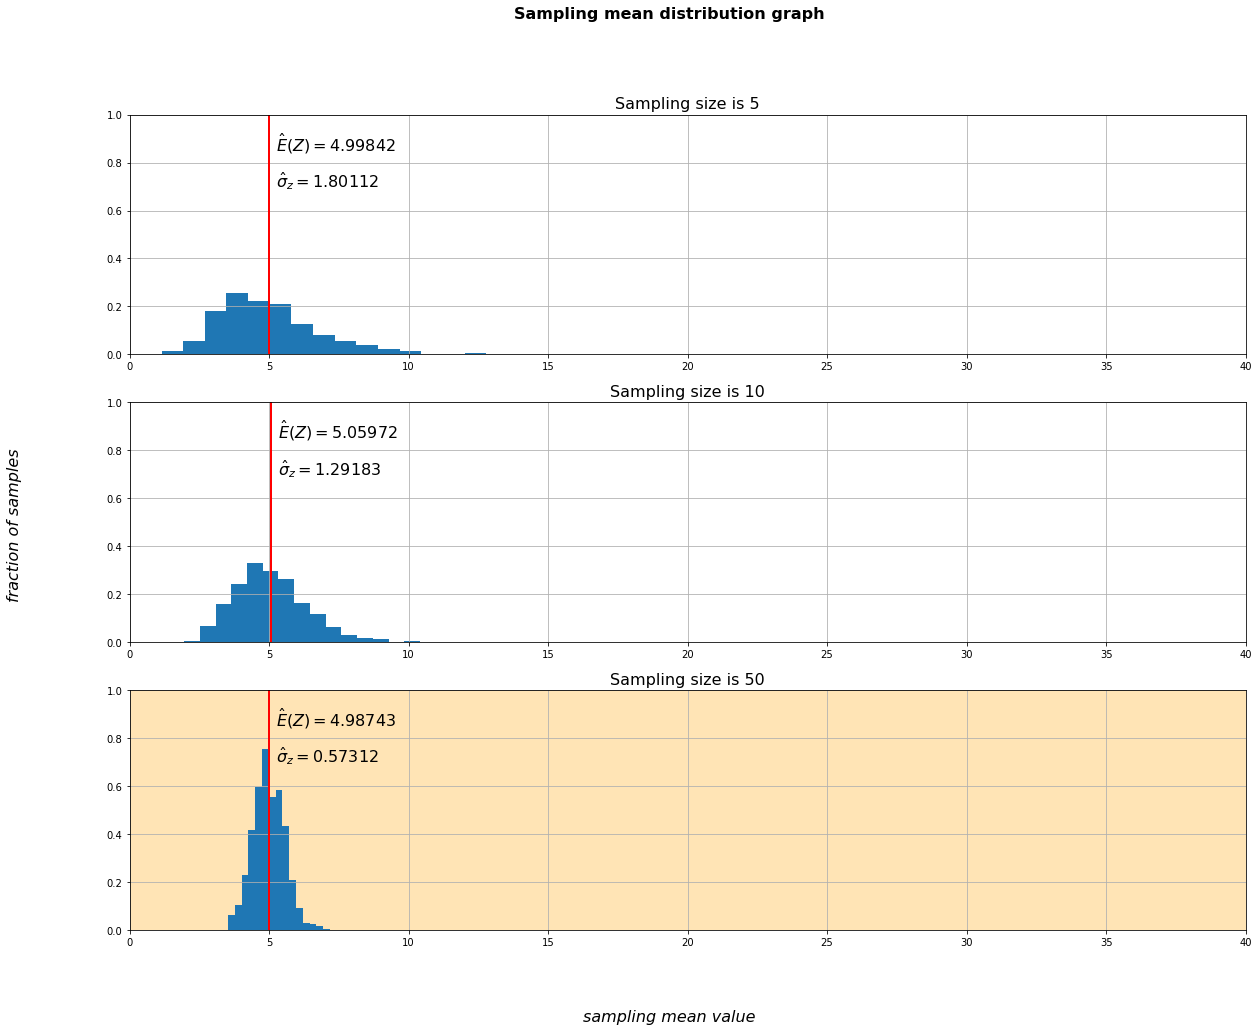

In [10]:
# Определяем константы
NUMBER_OF_BINS = 15                         # количество групп в гистограмме
SAMPLING_DATASET_SIZE = 1000                # количество элементов в выборке распределения среднего значения
SAMPLING_SIZE = (5,10,50)                   # размеры выборки для распределения среднего значения
MAX_Z_VALUE = np.max(z_distribution_sample) # максимальное значение СВ Z в исходной выборке

# Генерация выборки с распределением среднего значения
# переменная "sampling_size" соответствует параметру "k" из описания данного пункта в тексте
# для каждого значения размера выборки (k) генерируется отдельный набор данных размером <SAMPLING_DATASET_SIZE>
sampling_mean_distribution = dict()
for size in SAMPLING_SIZE:
    sampling_mean_distribution[size] = [np.mean(rnd.sample(z_distribution_sample, k=size)) 
                                             for _ in range(SAMPLING_DATASET_SIZE)]
# Подготовка области вывода графиков
fig, axes = plt.subplots(3,1)
fig.set_size_inches(20,15)

# Выводим заголовок и название осей координат
fig.suptitle("Sampling mean distribution graph", fontsize=16, fontweight="bold")

fig.text(0.5, 0.04, "sampling mean value", ha="center", 
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

fig.text(0.04, 0.5, "fraction of samples", 
         va='center', rotation='vertical',
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

# Итерируем по выборкам с распределением среднего и выводим для каждой из них отдельную гистограмму
for i, size in enumerate(sorted(sampling_mean_distribution.keys())):
    
    axes[i].grid(which="both")       # координатная сетка для под-графика
    axes[i].set_xlim(0, MAX_Z_VALUE) # диапазон значений по оси X под-графика
    axes[i].set_ylim(0,1)            # диапазон значений по оси Y под-графика
    axes[i].set_title("Sampling size is {0}".format(size),
                      fontdict= {"color":  "black","weight": "normal", "size": 16}) # заголовок под-графика
    
    # Расчитываем оценку среднего значения и стандартного отклонения по выборке
    sampling_mean = np.mean(sampling_mean_distribution[size])
    sampling_var  = np.var (sampling_mean_distribution[size])
    sampling_sigma = math.sqrt(sampling_var)
    
    # Выводим гистограмму
    axes[i].hist(sampling_mean_distribution[size], density=True, bins = NUMBER_OF_BINS)
    
    # Обозначаем оценку среднего значения вертикальной красной линией
    axes[i].vlines(x=sampling_mean,ymin=0,ymax=1.,label="Sampling mean",linewidth = 2, color="r")

    # Выводим текст со значением оценок среднего значения и стандартного отклонения
    axes[i].text(x=sampling_mean+0.25, 
             y = 0.85, 
             s=r"$\hat E\left(Z\right) = {0:5.5f}$".format(sampling_mean), 
             fontdict= {"color":"black", "weight":"normal", "size":16})

    axes[i].text(x=sampling_mean+0.25, 
             y = 0.7, 
             s="$\hat \sigma_z = {0:5.5f}$".format(sampling_sigma), 
             fontdict= {"color":"black", "weight":"normal", "size":16})
    
    # Отмечаем диаграмму №3 цветом фона, так как она наиболее соответствует картине нормального распределения.
    if i==2:
        axes[i].set_facecolor("moccasin")

plt.show()

Как видно из предоставленных выкладок, наиболее сильно подходит под картину нормального распределения гистограмма распределения выборочных средних с размером выборки 50 и длиною выборки в 1000 единиц. Такое заключение можно сделать исходя полноты и несмещенности оценки среднего значения Z по данным выборкам. 

Поскольку среднее значение является несмещенной оценкой математического ожидания (<a href="https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B5_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5">статья Wikipedia</a>), то оценка обладающая наибольшей эффективностью (т.е. наименьшей дисперсией) - считается наиболее правильной. 

В данном случае, нименьшую дисперсию показала оценка среднего значения Z, сделанная по совокупности выборок, размером в 50 значений - данная оценка имеет минимальную дисперсию (нижняя гистограмма).

<h3>9. Расчет параметров нормального распределения, аппроксимирующего распределение выборочных средних при заданном размере выборки</h3>

При аппроксимации распределения выборочных средних при помощи нормального распределения. Примем за основу следующую формулу:

$\hat E\left( Z \right) \approx \sim N \left( \mu_z, \frac{\sigma_z}{\sqrt{n}}\right), \quad 
\text{n} \textit{ - размер выборки, использованнный при построении распределения выборочных средних}
$

Для иллюстрации сходимости распределения выборочных средних к нормальному (гауссовскому) виду, начертим графики плотности апроксимирующего нормального распределения с указанными выше параметрами поверх гистограмм выборочного среднего для всех размеров выборок $k = \left\{5, 10, 50\right\}$:

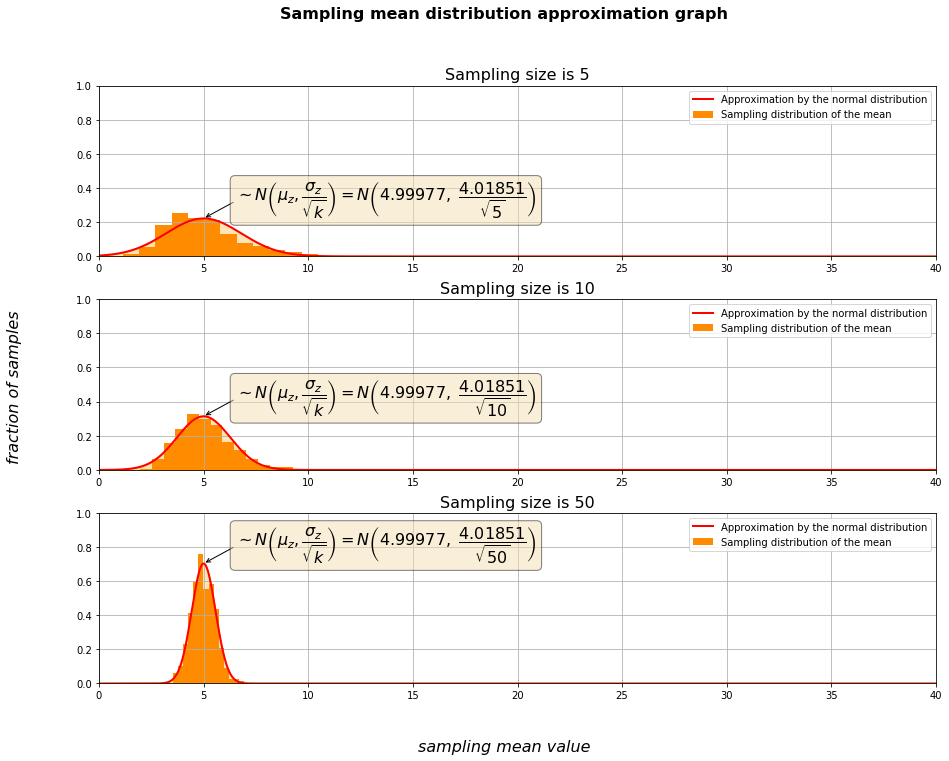

In [11]:
# Готовим графический вывод группы графиков (3 х 1)
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15,11)
fig.subplots_adjust(hspace=0.25)

# Выводим заголовок группы графиков и название осей координат
fig.suptitle("Sampling mean distribution approximation graph", fontsize=16, fontweight="bold")

fig.text(0.5, 0.04, "sampling mean value", ha="center", 
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

fig.text(0.04, 0.5, "fraction of samples", 
         va='center', rotation='vertical',
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

# Создаем структуры данных для будущего использования
z_distribution_normal_space = np.linspace(0, MAX_Z_VALUE, len(z_distribution_sample)) # область определения функции плотности
z_distribution_normal_approximation = dict() # данные аппрокимирующей плотности вероятности

# Итерируем по всем выборка распределения среднего значения
for i, size in enumerate(SAMPLING_SIZE):
    
    # Выводим название подграфика и координатную сетку (в заданном диапазоне)
    axes[i].grid(which="both")
    axes[i].set_xlim(0, MAX_Z_VALUE)
    axes[i].set_ylim(0, 1.)
    axes[i].set_title("Sampling size is {0}".format(size),
                      fontdict= {"color":  "black","weight": "normal", "size": 16})
    
    # Создаем экземпляр аппроксимирующего нормального распределения и генерируем набор данных 
    # апроксимирующей плотности для каждой выборки распределения среднего значения
    norm_rv = st.norm(z_mean, z_sigma/math.sqrt(size))
    z_distribution_normal_approximation[size] = [norm_rv.pdf(x) for x in z_distribution_normal_space]
    
    # Выводим гистограмму распределения среднего в под-график
    axes[i].hist(sampling_mean_distribution[size], 
                 density=True, bins = NUMBER_OF_BINS, color="darkorange",
                 label="Sampling distribution of the mean")
    
    # Выводим функцию плотности вероятности апроксимирующего нормального распределения в под-график
    axes[i].plot(z_distribution_normal_space, z_distribution_normal_approximation[size],"r-", linewidth=2.0,
                 label="Approximation by the normal distribution")
    
    # Отрисовываем область под графиком апроксимирующей плотности вероятности
    axes[i].fill_between(x=z_distribution_normal_space,
                     y1 = z_distribution_normal_approximation[size],
                     y2 = np.zeros(len(z_distribution_normal_space)),
                     facecolor="moccasin", 
                     edgecolor="orange", 
                     linewidth=1
                    )
    
   
    # Рассчитываем координаты конца стрелки-указателя
    annotation_point_index = np.argmin(abs(z_distribution_normal_approximation[size] - z_mean))
    annotation_point_y = z_distribution_normal_approximation[size][annotation_point_index]
    
    # Формируем текст аннотации
    annotation_str = r"$\sim N \left( \mu_z, \dfrac{{\sigma_z}} {{ \sqrt{{k}} }}\right)= N \left( {0:5.5f}, \\
                        \dfrac{{ {1:5.5f} }} {{\sqrt{{ {2} }} }}\right)$".format(z_mean, z_sigma, size)
    
    # Определяем параметры отображения области аннотации на графике
    annotation_box_props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    
    # Выводим стрелку
    axes[i].annotate("",  xy=(z_mean, annotation_point_y), 
                                      xytext=(z_mean + 1.5, annotation_point_y + 0.1), 
                                      arrowprops={"facecolor":"red", "arrowstyle":"->"})
    # Выводим текст аннотации
    axes[i].text(x=z_mean+1.5, 
                 y = annotation_point_y + 0.1, 
                 s=annotation_str, 
                 fontdict= {"color":"black", "weight":"normal", "size":16},
                 bbox=annotation_box_props)
    
    # Выводим легенду
    axes[i].legend()
    
plt.show()

<h3> Оценка скорости сходимости распределения выборочных средних к нормальному (гауссовскому) виду </h3>

Для оценки скорости сходимости применим следующий подход:
<ul>
<p>
<li>сначала построим функцию плотности $h \left( z \right)$ по каждой из полученных выборок. Для этого будем использовать метод ядерного сглаживания (KDE- kernel density estimation), доступный из библиотеки scipy.stats.</li>
<p>
<li>далее получив функцию выборочной плотности, измерим расстрояние между известной функцией апроксимируюшей плотности $g \left( z \right)$ (см. выше) и функцией выборочной плотности $h \left( z \right)$, полученной на первом шаге. Для изменения расстрояния в дискретном пространстве элементарных исходов воспользуемся следующей мерой: $\rho \left( k \right) = \sum_{i=1}^{n} \left| g_k \left( i \right) - h_k \left( i \right) \right|$ (т.к. данная функция обладает всеми необходимыми свойствами метрики <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%BE">статья Wikipedia</a>).</li>
<p>
<li>и в завершение, построим график функции $\rho \left( k \right)$, чтобы проанализировать скорость сходимости - минимизацию расстояния между выборочной $h \left( z \right)$ и аппроксимируюшей $g \left( z \right)$ плотностями в зависимости от размера выборки $k$.</li>
</ul>

График функции выборочной плотности $h \left( z \right)$ с расчитанной метрикой сходимости $\rho \left( k \right)$ для выборок размера $k = \left\{5, 10, 50\right\}$ выглядят следующим образом:

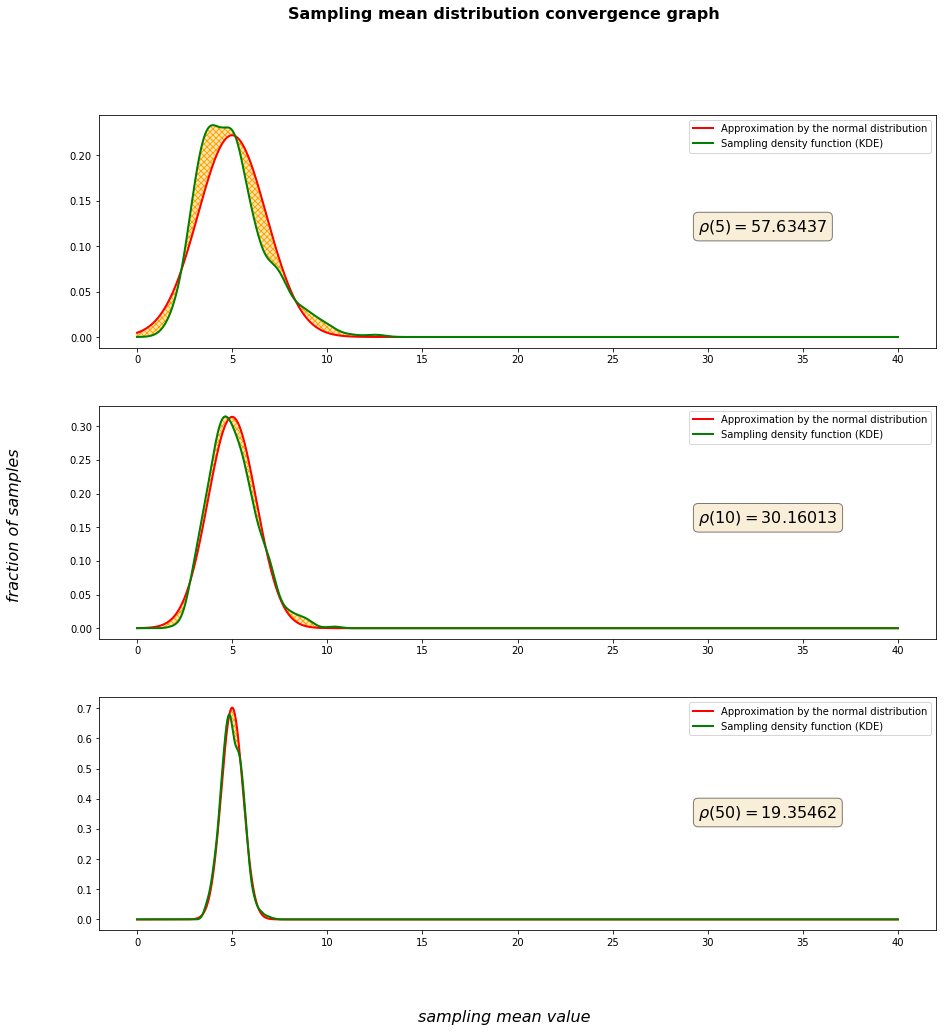

In [12]:
# Готовим вывод группы графиков (3 х 1)
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.25)

# Выводим общий заголовок группы графиков
fig.suptitle("Sampling mean distribution convergence graph", fontsize=16, fontweight="bold")

# Выводим название общих осей координат
fig.text(0.5, 0.04, "sampling mean value", ha="center", 
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

fig.text(0.04, 0.5, "fraction of samples", 
         va='center', rotation='vertical',
         fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

# Создаем структуры данных для будущего испольдования
z_distribution_kde = dict() # - набор данных по функции плотности вероятности, 
                            #   полученной путем ядерного сглаживания данных выборки.
                            #   Набор данных формируется для каждой выборки распределения среднего.

rho = dict()                # - набор данных по метрике расстояния между апроксимирующей и выборочной
                            #   функцией плотности вероятности.
                            #   Набор данных формируется для каждой выборки распределения среднего.

        
# Итерируем по всем выборкам распределения среднего значения
for i, size in enumerate(SAMPLING_SIZE):
    
        # Создем экземпляр адаптера ядерного сглаживания на основании данных выборки
        kde_adapter = st.gaussian_kde(dataset=sampling_mean_distribution[size], bw_method="scott")
        
        # Создаем набор данных для отображения функции выборочной плотности вероятности
        z_distribution_kde[size] = kde_adapter.pdf(z_distribution_normal_space)
        
        # Отображаем функцию апроксимирующей нормальной плотности вероятности
        axes[i].plot(z_distribution_normal_space, z_distribution_normal_approximation[size], "r-", linewidth=2.0,
                 label="Approximation by the normal distribution")
        
        # Отображаем функцию выборочной плотности вероятности
        axes[i].plot(z_distribution_normal_space, z_distribution_kde[size], "g-", linewidth=2.0,
                 label="Sampling density function (KDE)")
        
        # Отрисовываем область расстояния между графиками
        axes[i].fill_between(x=z_distribution_normal_space,
                             y1 = z_distribution_normal_approximation[size],
                             y2 = z_distribution_kde[size],
                             facecolor="moccasin", 
                             edgecolor="orange", 
                             linewidth=1,
                             hatch="xxxx" )
        
        # Выводим легенду
        axes[i].legend()
        
        # Рассчитываем метрику расстояния между выборочной и апроксимирующей функцией вероятности 
        # для каждой выборки распределения среднего значения
        rho[size] = np.sum(np.abs(np.array(z_distribution_normal_approximation[size]) - z_distribution_kde[size]))
        
        # Выводим значение метрики расстояния
        annotation_box_props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        axes[i].text(x=29.5, y = np.max( z_distribution_kde[size])/2., 
                     s=r"$\rho \left({0}\right)={1:5.5f}$".format(size, rho[size]), 
                     fontdict= {"color":"black", "weight":"normal", "size":16},
                     bbox=annotation_box_props)
        
plt.show()

Для оценки динамики изменения метрики сходимости применим анализ углового коэффициента функции $\rho \left(k\right)$:

$\phi \left(k_i\right) = \dfrac{|\rho \left(k_i\right) - \rho \left(k_{i-1}\right)|}{k_i-k_{i-1}}$

Теперь построим график зависимости метрики сходимости выборочной плотности к нормальному (гауссовскому) виду в зависимости от размера выборки $k = \left\{5, 10, 50\right\}$:

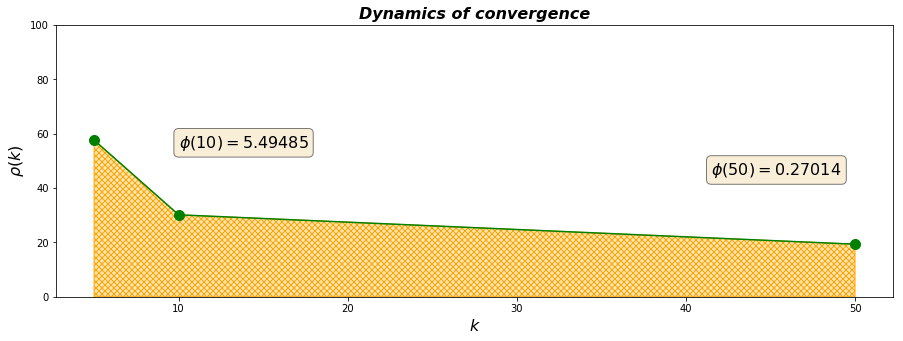

In [13]:
# Готовим структуры данных для будущего использлвания
rho_values = [rho[size] for size in SAMPLING_SIZE] # - плоский массив в данными метрики сходимости
phi_values = list()                                # - структура для угловых коэффициентов функции сходимости

# Итерируем по всем значениям метрики сходимости и расчитываем данные углового коэффициента
for i in range(len(SAMPLING_SIZE)):
    if i!=0:
        delta_x = SAMPLING_SIZE[i] - SAMPLING_SIZE[i-1]
        delta_y = abs(rho_values[i] - rho_values[i-1])
        phi_value = delta_y/delta_x
        phi_values.append((phi_value, r"$\phi\left({0}\right)={1:5.5f}$".format(SAMPLING_SIZE[i], phi_value)))

# Готовим графический вывод
fig = plt.figure(figsize=(15,5))

# Выводим название граифика и название осей координат
plt.title("Dynamics of convergence", fontdict= {"color":  "black", "style":"italic", "weight": "bold", "size": 16})
plt.xlabel(r"$k$", fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})
plt.ylabel(r"$\rho \left(k\right)$", fontdict= {"color":  "black", "style":"italic", "weight": "normal", "size": 16})

# Задаем вертикальный диапазон графика
plt.ylim(0,100)

# Выводим функцию сходимости и данные угловых коэффициентов
plt.plot(SAMPLING_SIZE, rho_values,"g-", marker="o",markersize=10)

# Отрисовываем область под графиком функции сходимости
plt.fill_between(x=SAMPLING_SIZE, y1 = np.zeros(len(SAMPLING_SIZE)), y2 = rho_values,
                 facecolor="moccasin", edgecolor="orange", linewidth=1, hatch="xxxx")

# Выводим данные угловых коэффициентов
annotation_box_props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    
plt.text(x=10., y = 55., 
         s=phi_values[0][1], 
         fontdict= {"color":"black", "weight":"normal", "size":16},
         bbox=annotation_box_props)

plt.text(x=41.5, y = 45., 
         s=phi_values[1][1], 
         fontdict= {"color":"black", "weight":"normal", "size":16},
         bbox=annotation_box_props)

# Финализируем график и выводим его на экран
plt.show()

<h3>Выводы</h3>

Как мы увидели из произведенных расчетов и графиков, распределения выборочных средних синтетической случайной величины Z, не имеющей никакого отношения к нормальному распределению, сходится к нормальному (гауссовскому) виду. Скорость схождения расчет с увеличением объема выборки. Так, с увеличение размера выборки в 10 раз (c $k=5$ до $k=50$), расстоние мужду функциями плотностей сокращается в $\geq$ 2 раза.

Как мы видим из графиков, при увеличении объема выборки до $k=50$, плотность распределения выборочных средних практически полностью соответствует нормальному (гауссовскому) виду, а значит с высокой степенью достоверности может быть описана нормальным распределением вида $\sim N \left( \mu_z, \dfrac{{\sigma_z}} {{ \sqrt{{k}} }}\right)$.